<a href="https://colab.research.google.com/github/gyhou/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/GH_144_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns
from numpy.linalg import eig

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [17]:


df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [55]:
df_drop = df.drop(['diagnosis','Unnamed: 32','id'], axis=1)
df_drop.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- Do K-means on the PCA fit trasformed data
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

## PCA Fit Transformed Data

In [97]:
# set PCA components
pca = PCA(n_components=6)

# standardize df
df_stand = (df_drop - df_drop.mean())/df_drop.std()

# fit and transform df to PCA columns
pca_array = pca.fit_transform(df_stand)

df_pca = pd.DataFrame(pca_array, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
df_pca['diagnosis'] = df['diagnosis']
print(df_pca.shape)
df_pca.head()

(569, 7)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,diagnosis
0,9.184755,1.946870,-1.122179,3.630536,-1.194060,1.410181,M
1,2.385703,-3.764859,-0.528827,1.117281,0.621228,0.028633,M
2,5.728855,-1.074229,-0.551263,0.911281,-0.176930,0.540976,M
3,7.116691,10.266556,-3.229948,0.152413,-2.958275,3.050737,M
4,3.931842,-1.946359,1.388545,2.938054,0.546267,-1.225417,M


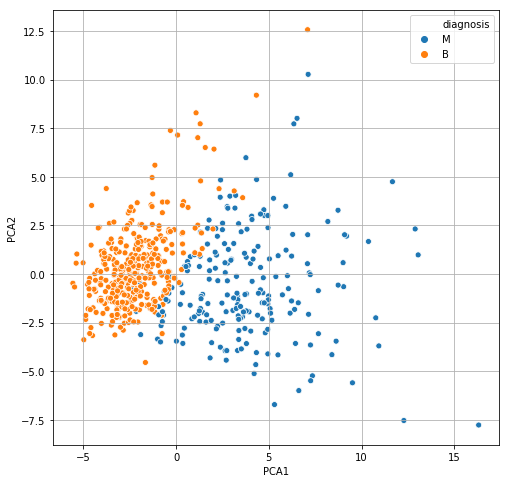

In [102]:
fig, ax = plt.subplots(figsize=(8,8))

plt.grid()
sns.scatterplot(x='PCA1',y='PCA2', data=df_pca, hue='diagnosis')
plt.show()

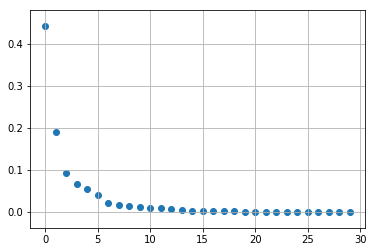

In [107]:
# scree plot
pca = PCA(30)
pca_array = pca.fit_transform(df_stand)
pca_ratio = pca.explained_variance_ratio_
x = range(30)
plt.scatter(x,pca_ratio);
plt.grid()

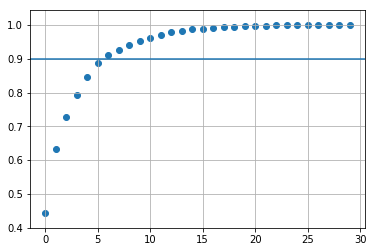

In [98]:
pca = PCA(30)
pca_array = pca.fit_transform(df_stand)
pca_ratio = pca.explained_variance_ratio_
x = range(30)
plt.scatter(x,pca_ratio.cumsum());
plt.axhline(.9) #90% total variance ratio
plt.grid()

In [100]:
# PCA variance ratio

print('PCA1 explains {0:,.2f}% of variance.'.format(pca_ratio[0]*100))
print('PCA2 explains {:,.2f}% of variance.'.format(pca_ratio[1]*100))
print('Combined PCA 1 & 2 explains {:,.2f}% of variance.'.format(((pca_ratio[0]*100))+(pca_ratio[1]*100)))

PCA1 explains 44.27% of variance.
PCA2 explains 18.97% of variance.
Combined PCA 1 & 2 explains 63.24% of variance.


In [101]:
# PCA variance ratio
# PCA1 explains 44.27% of variance.
eigenvalues, eigenvectors = eig(df_norm.cov())
eigenvalues / eigenvalues.sum()

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 4.43482743e-06,
       2.49601032e-05, 5.29779290e-05, 2.30015463e-04, 2.72587995e-04,
       5.16042379e-04, 6.01833567e-04, 8.11361259e-04, 9.14646751e-04,
       1.03864675e-03, 9.99096464e-04])

## K-Means

In [0]:
import math
from scipy.spatial import distance
from sklearn.cluster import KMeans 

In [128]:
pca_array[:,:2].shape

(569, 2)

In [129]:
# only working w/ PCA1, PCA2
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_array[:,:2])
labels = kmeans.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

In [130]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df_pca['clusters1&2'] = new_series.values

df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,diagnosis,clusters
0,9.184755,1.946870,-1.122179,3.630536,-1.194060,1.410181,M,1
1,2.385703,-3.764859,-0.528827,1.117281,0.621228,0.028633,M,1
2,5.728855,-1.074229,-0.551263,0.911281,-0.176930,0.540976,M,1
3,7.116691,10.266556,-3.229948,0.152413,-2.958275,3.050737,M,1
4,3.931842,-1.946359,1.388545,2.938054,0.546267,-1.225417,M,1


In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].PCA1, centroids.iloc[0].PCA2, "ok")
  ax.plot(centroids.iloc[1].PCA1, centroids.iloc[1].PCA2, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='PCA1', y='PCA2', label=key, color=colors[key])
  plt.show()

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

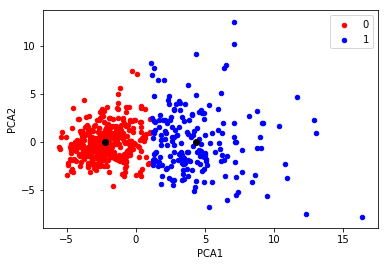

<function matplotlib.pyplot.grid>

In [139]:
centroids = get_centroids(df_pca, 'clusters')
plot_clusters(df_pca, 'clusters', centroids)

In [154]:
# accuracy PCA test and observation
a=0
b=0
for x in range(df_pca.shape[0]):
  if (df_pca['diagnosis'][x]=='M') and (df_pca['clusters'][x]==1):
    a += 1
  elif (df_pca['diagnosis'][x]=='B') and (df_pca['clusters'][x]==0):
    a+=1
  else:
    b += 1

print('PCA 1 & 2 prediction is {:,.2f}% accurate.'.format((a/(a+b))*100))

PCA 1 & 2 prediction is 90.69% accurate.


# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.